# Used Car Price Prediction

## FINAL SEMESTER PROJECT - SUMMER 2021


## Syed Muhammad Sabih

---

### Project Statement

For the US Cars Dataset, the analysis pertains to predict the price of the car based on the appropriate features.

### Dataset Information

The dataset is from the Kaggle Repository and was scraped from auctionexport.com. The dataset includes information about 28 brands of clean and used vehicles for sale in the US.<br>
The dataset includes 12 features: price, years, brand, model, color, state, mileage, VIN, title status, lot, and the condition.

### Feature Description

- Price: The sale price of the vehicle
- Year: Vehicle registration year
- Brand: Brand/Make of the vehicle
- Model: Model of the vehicle
- Color: Color of the vehicle
- State: The location where the vehicle is for sale
- Mileage: Miles traveled by the vehicle
- VIN: Vehicle identification number
- Title status: Clean or salvage title
- lot: lot number from the manufacturer
- condition: time

### Library Import

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean
from numpy import std
from pandas import read_csv

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn.feature_selection import SelectKBest, chi2 , f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, auc

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from tabulate import tabulate
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

### Loading the Dataset

In [131]:
df = pd.read_csv("C:/Users/smsab/Desktop/UCF/STA - 6704/dataset/USA_cars_datasets.csv")
df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


---

### Exploratory Data Analysis

Based on the knowledge of cars and in my experience, the price of a used car usually depends on the brand, model, year, title status, mileage, color, and what state the car is located in. For the purpose of this analysis, lets drop the VIN, lot number, country, and condition column.

In [132]:
#Dropping the irrelevant columns
df = df.drop(["Unnamed: 0", "vin", "lot", "country","condition"], axis=1)

In [133]:
df.head(10).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})

,price,brand,model,year,title_status,mileage,color,state
0,6300,toyota,cruiser,2008,clean vehicle,274117.000,black,new jersey
1,2899,ford,se,2011,clean vehicle,190552.000,silver,tennessee
2,5350,dodge,mpv,2018,clean vehicle,39590.000,silver,georgia
3,25000,ford,door,2014,clean vehicle,64146.000,blue,virginia
4,27700,chevrolet,1500,2018,clean vehicle,6654.000,red,florida
5,5700,dodge,mpv,2018,clean vehicle,45561.000,white,texas
6,7300,chevrolet,pk,2010,clean vehicle,149050.000,black,georgia
7,13350,gmc,door,2017,clean vehicle,23525.000,gray,california
8,14600,chevrolet,malibu,2018,clean vehicle,9371.000,silver,florida
9,5250,ford,mpv,2017,clean vehicle,63418.000,black,texas


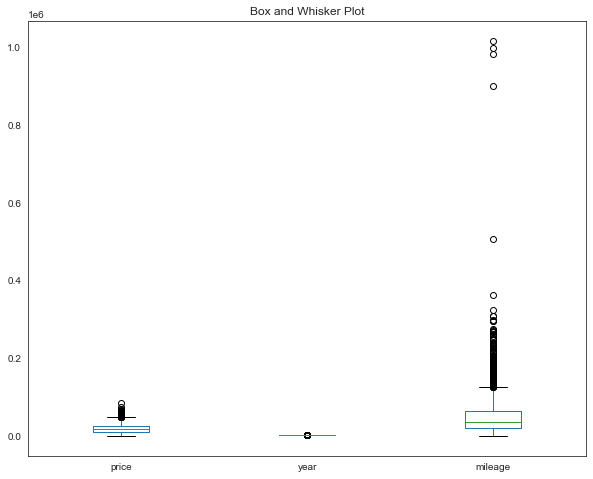

In [134]:
#Lets look at the spread of the initial data
boxplot_data = df.plot.box(title="Box and Whisker Plot")
plt.show()

At this point, the data is raw, and not been pre-processed. The box and whisker plot will not show promising results.

#### Investigating Numeric and Categorical Variables

In [135]:
#Type of the variables
df.dtypes

price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
state            object
dtype: object

In [136]:
#Descriptive Statistics
pd.set_option('precision',3)
df.describe(include='all')

,price,brand,model,year,title_status,mileage,color,state
count,2499.000,2499,2499,2499.000,2499,2.499e+03,2499,2499
unique,NaN,28,127,NaN,2,NaN,49,44
top,NaN,ford,door,NaN,clean vehicle,NaN,white,pennsylvania
freq,NaN,1235,651,NaN,2336,NaN,707,299
mean,18767.671,NaN,NaN,2016.714,NaN,5.230e+04,NaN,NaN
std,12116.095,NaN,NaN,3.443,NaN,5.971e+04,NaN,NaN
min,0.000,NaN,NaN,1973.000,NaN,0.000e+00,NaN,NaN
25%,10200.000,NaN,NaN,2016.000,NaN,2.147e+04,NaN,NaN
50%,16900.000,NaN,NaN,2018.000,NaN,3.536e+04,NaN,NaN
75%,25555.500,NaN,NaN,2019.000,NaN,6.347e+04,NaN,NaN


In [137]:
# Checking for unique columns

print("\n\nUnique column values in dataset\n", df.nunique())



Unique column values in dataset
 price            790
brand             28
model            127
year              30
title_status       2
mileage         2439
color             49
state             44
dtype: int64


Categorical Variables are brand, model, title, color, and state.

#### Checking for duplicate rows and deleting them

At this point, lets delete any duplicate rows.

In [138]:
#Count of the variables before deleting duplicate rows
count_before_removing_dup = pd.DataFrame(df.count())
count_before_removing_dup.style.set_caption("Count of variables before removing duplicates")

,0
price,2499
brand,2499
model,2499
year,2499
title_status,2499
mileage,2499
color,2499
state,2499


In [139]:
#Checking for Duplicate rows
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.style.set_caption("Duplicate Rows")

,price,brand,model,year,title_status,mileage,color,state
518,50,chevrolet,door,2008,salvage insurance,172102.000,blue,texas
530,0,chevrolet,door,2003,salvage insurance,194673.000,gray,texas
541,25,chevrolet,pickup,2010,salvage insurance,149189.000,white,colorado
661,26900,chevrolet,traverse,2018,clean vehicle,42941.000,black,missouri


In [140]:
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4, 8)


##### Deleting 4 duplicate rows

In [141]:
#Deleting the Duplicate rows
df = df.drop_duplicates()
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


In [143]:
#Count of the data after deleting duplicate rows
count_after_removing_dup = pd.DataFrame(df.count())
count_after_removing_dup.style.set_caption("Count of variables after removing duplicates")

,0
price,2495
brand,2495
model,2495
year,2495
title_status,2495
mileage,2495
color,2495
state,2495


In [12]:
#New shape of the dataset
print(" dataset: ( rows, columns) = ", df.shape)

 dataset: ( rows, columns) =  (2495, 8)


#### Checking for any missing values

In [13]:
#Finding the null values
print(df.isnull().sum())

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
dtype: int64


There are no missing values

#### Modifying the Year Variable

In [14]:
#Fixing the year variable to where it shows how old the car is
def mod_year(x):
    return 2021 - x
df['year'] = mod_year(df.year)
df

<ipython-input-14-67f2d1a5d522>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = mod_year(df.year)


,price,brand,model,year,title_status,mileage,color,state
0,6300,toyota,cruiser,13,clean vehicle,274117.0,black,new jersey
1,2899,ford,se,10,clean vehicle,190552.0,silver,tennessee
2,5350,dodge,mpv,3,clean vehicle,39590.0,silver,georgia
3,25000,ford,door,7,clean vehicle,64146.0,blue,virginia
4,27700,chevrolet,1500,3,clean vehicle,6654.0,red,florida
...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2,clean vehicle,23609.0,red,california
2495,9200,nissan,versa,3,clean vehicle,34553.0,silver,florida
2496,9200,nissan,versa,3,clean vehicle,31594.0,silver,florida
2497,9200,nissan,versa,3,clean vehicle,32557.0,black,florida


#### Visualize the top brands of the vehicle by count

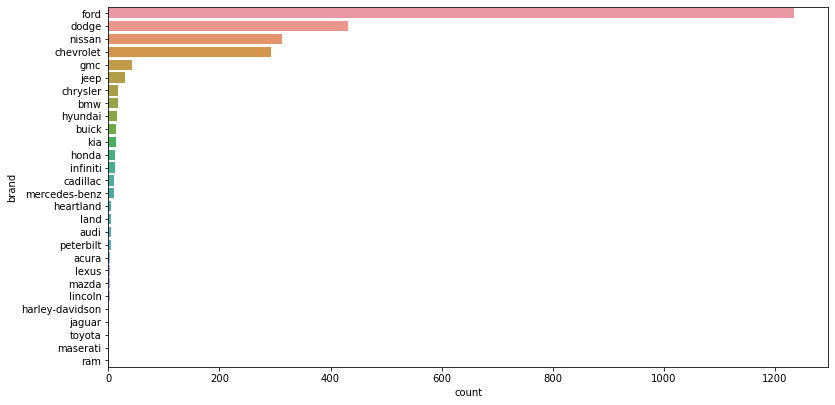

In [15]:
brand_count = df['brand'].value_counts().to_frame().reset_index()
brand_count.rename(columns={'index':'brand', 'brand':'count'}, inplace=True)

fig = plt.figure(figsize=(10, 5))

axes = fig.add_axes([0, 0, 1, 1])

sns.barplot(y = brand_count['brand'], x = brand_count['count'], ax=axes)

##### Since we have a larger number of vehicles that are Ford, Dodge, Nissan, Chevorlet, and GMC, lets only take the datapoints that incorporate the top 5 brands for the dataset

In [16]:
# Set the index of the DataFrame to the brand name
df1 = df.set_index("brand")
#Drop the brands other than top 5
df1 = df1.drop(["jeep","chrysler","bmw","hyundai","buick","kia","honda","infiniti","cadillac",
               "mercedes-benz","heartland","audi","land","peterbilt","acura","lincoln","mazda",
               "lexus","jaguar","ram","maserati","harley-davidson","toyota"])

In [17]:
#Reset the index to have brand as a column/feature
df1.reset_index(level=0, inplace=True)

In [18]:
#Visualize the shape of the dataset
df1

,brand,price,model,year,title_status,mileage,color,state
0,ford,2899,se,10,clean vehicle,190552.0,silver,tennessee
1,dodge,5350,mpv,3,clean vehicle,39590.0,silver,georgia
2,ford,25000,door,7,clean vehicle,64146.0,blue,virginia
3,chevrolet,27700,1500,3,clean vehicle,6654.0,red,florida
4,dodge,5700,mpv,3,clean vehicle,45561.0,white,texas
...,...,...,...,...,...,...,...,...
2309,nissan,7800,versa,2,clean vehicle,23609.0,red,california
2310,nissan,9200,versa,3,clean vehicle,34553.0,silver,florida
2311,nissan,9200,versa,3,clean vehicle,31594.0,silver,florida
2312,nissan,9200,versa,3,clean vehicle,32557.0,black,florida


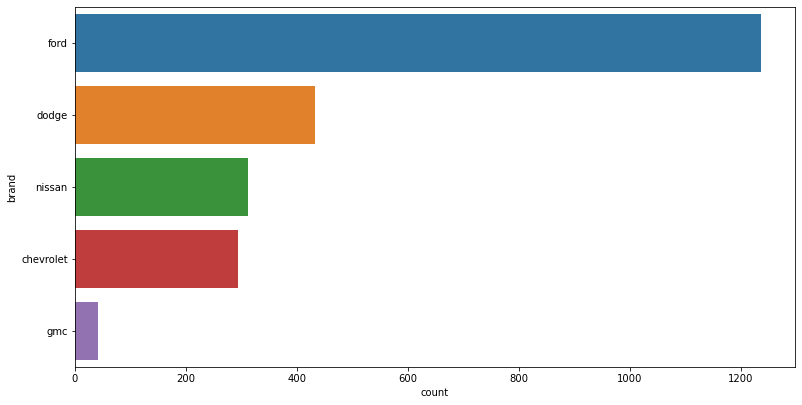

In [19]:
brand_count = df1['brand'].value_counts().to_frame().reset_index()
brand_count.rename(columns={'index':'brand', 'brand':'count'}, inplace=True)

fig = plt.figure(figsize=(10, 5))

axes = fig.add_axes([0, 0, 1, 1])

sns.barplot(y = brand_count['brand'], x = brand_count['count'], ax=axes)

In [20]:
#Number of records removed
no_of_records_removed = df.count()-df1.count()
no_of_records_removed

brand           181
color           181
mileage         181
model           181
price           181
state           181
title_status    181
year            181
dtype: int64

181 records removed

#### Visualize the numeric variables

##### Univariate graphs

Text(0.5, 1.0, 'Mileage')

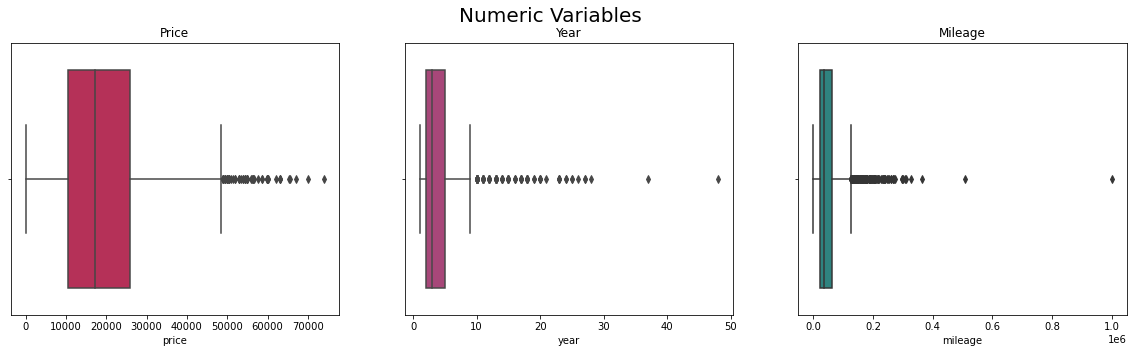

In [21]:
#Box Plots for Numeric Variables
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Numeric Variables', fontsize=20)

# Price
sns.boxplot(ax=axes[0], x=df1['price'], palette="rocket")
axes[0].set_title("Price")

# Year
sns.boxplot(ax=axes[1], x=df1['year'], palette="magma")
axes[1].set_title("Year")

# Mileage
sns.boxplot(ax=axes[2], x=df1['mileage'], palette="viridis")
axes[2].set_title("Mileage")

Text(0.5, 1.0, 'Mileage')

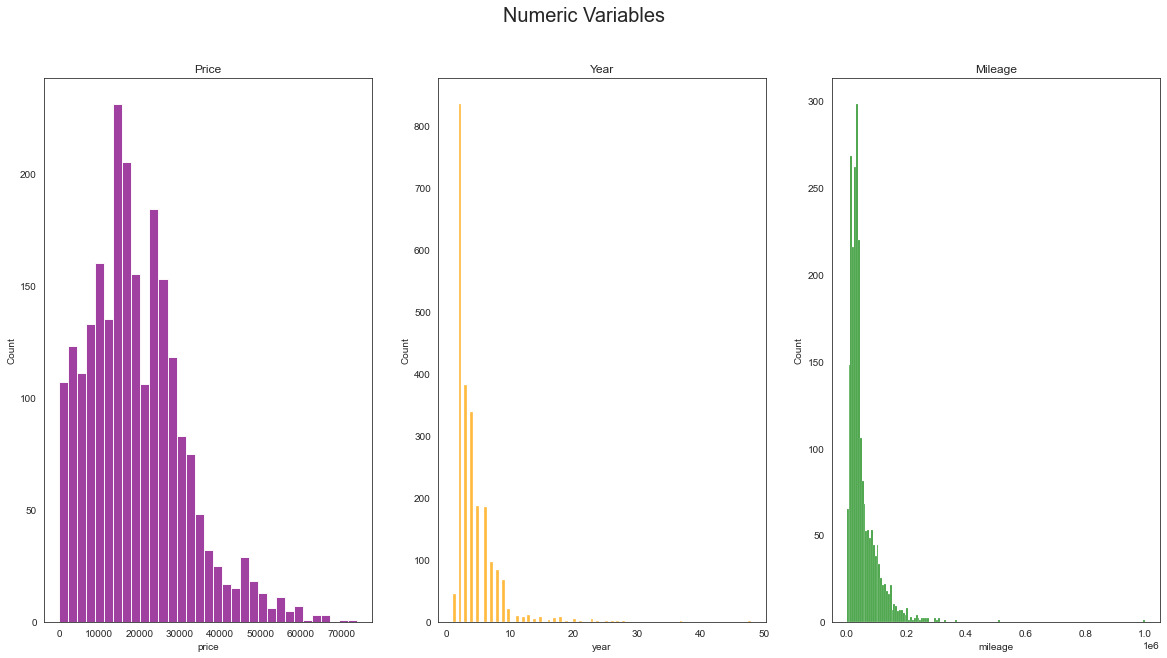

In [144]:
#Histogram for Numeric Variables
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Numeric Variables', fontsize=20)

# Price
sns.histplot(ax=axes[0], x=df1['price'], color='purple')
axes[0].set_title("Price")

# Year
sns.histplot(ax=axes[1], x=df1['year'], color='orange')
axes[1].set_title("Year")

# Mileage
sns.histplot(ax=axes[2], x=df1['mileage'], color='green')
axes[2].set_title("Mileage")

C:\Users\smsab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\smsab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\smsab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Mileage')

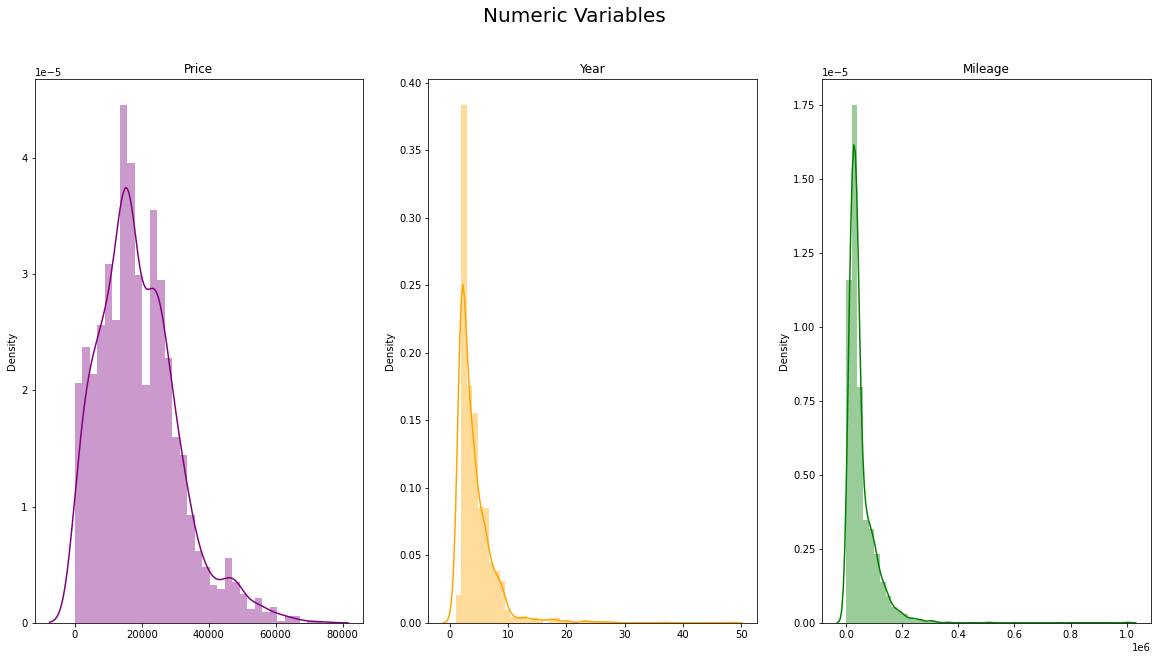

In [23]:
#Density Plot for Numeric Variables
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Numeric Variables', fontsize=20)

# Price
sns.distplot(ax=axes[0], x=df1['price'], color='purple')
axes[0].set_title("Price")

# Year
sns.distplot(ax=axes[1], x=df1['year'], color='orange')
axes[1].set_title("Year")

# Mileage
sns.distplot(ax=axes[2], x=df1['mileage'], color='green')
axes[2].set_title("Mileage")

At this point, we want to include the outliers in this analysis, since there are also older cars or salvage cars that cost less. We can see that the price target variable is skewed to the left. Along with the price, we can also see year and mileage variables are also skewed.

##### Bivariate graphs

Lets investigate the relationship between the price and year, and price and mileage.

Text(0.5, 1.0, 'Price and Mileage')

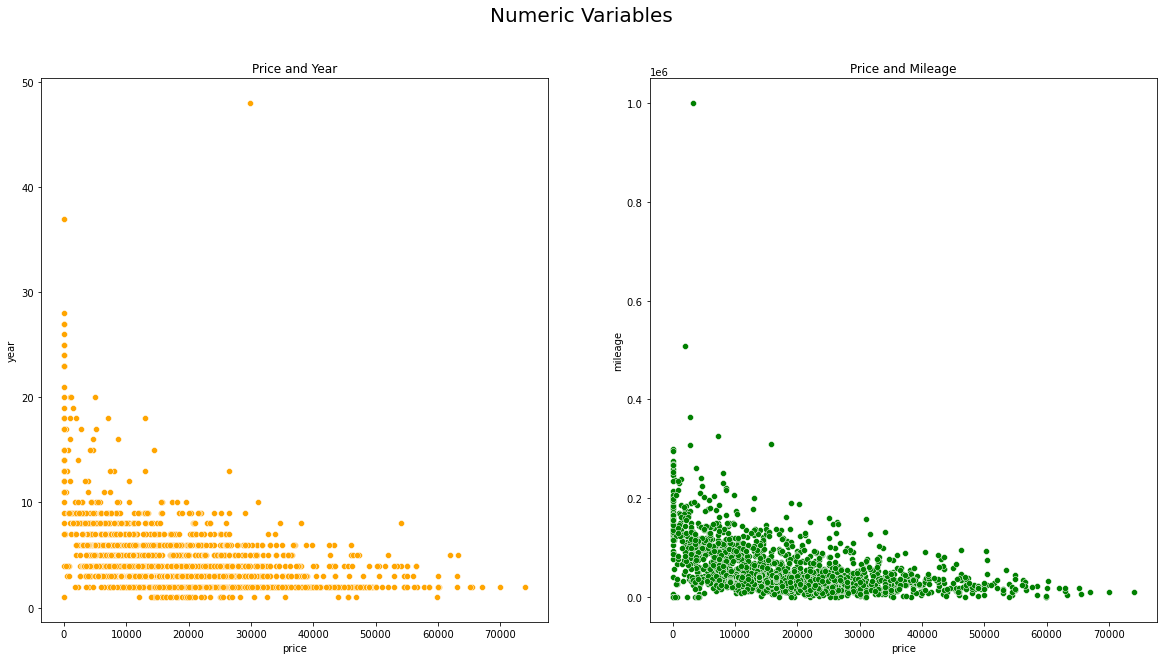

In [24]:
#Density Plot for Numeric Variables
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Numeric Variables', fontsize=20)

# Price and Year
sns.scatterplot(x="price", y="year", data=df1, color='orange', ax=axes[0])
axes[0].set_title("Price and Year")

#Price and Mileage
sns.scatterplot(x="price", y="mileage", data=df1, color='green', ax=axes[1])
axes[1].set_title("Price and Mileage")

<Figure size 1440x720 with 0 Axes>

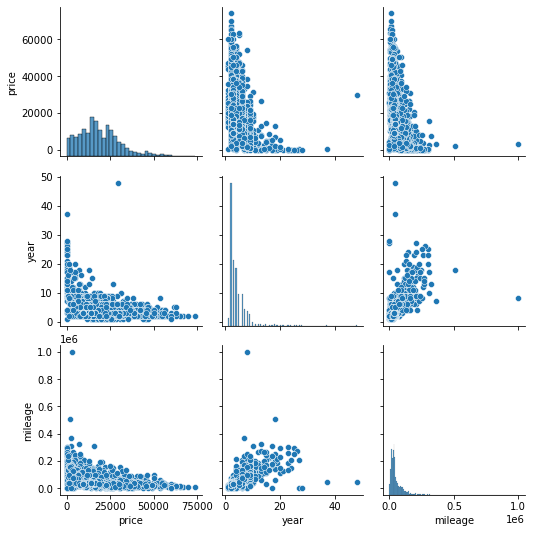

In [25]:
plt.figure(figsize=(20, 10))
sns.pairplot(df1)

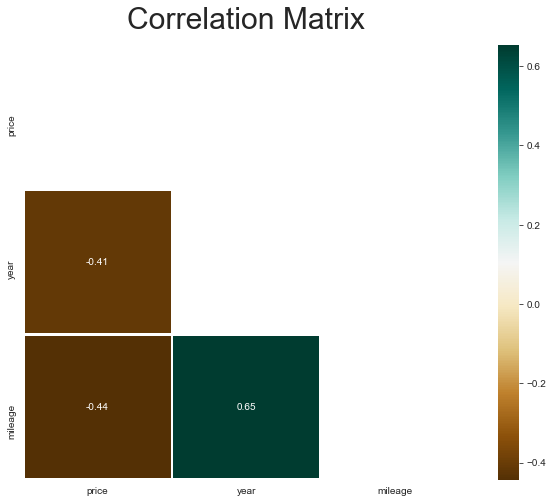

In [26]:
#correlation matrix
plt.figure(figsize=(10, 8))
sns.set_style('white')
mask = np.triu(np.ones_like(df1.corr(), dtype=np.bool))
heatmap = sns.heatmap(df1.corr(), mask=mask,annot=True, cmap='BrBG', linewidths = 2)
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':30}, pad=16);

#### Visualize the categorical variables

##### Brand

Text(0.5, 1.0, 'Brand and Mileage')

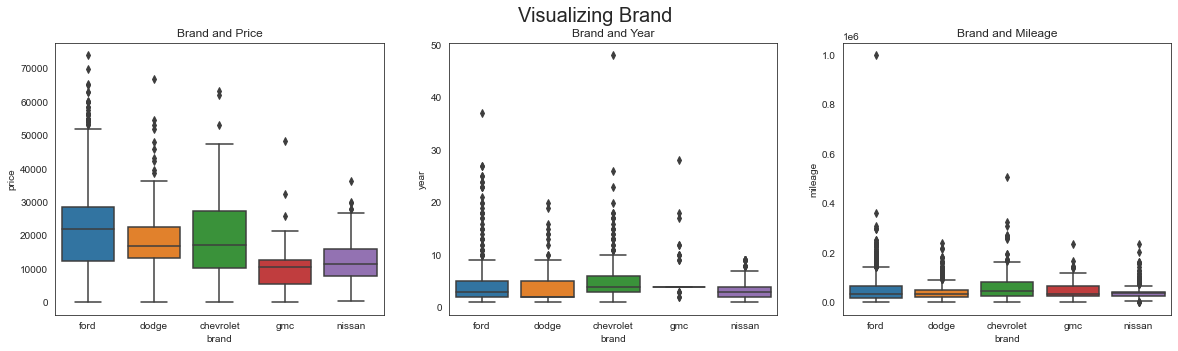

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Visualizing Brand', fontsize=20)

#Brand and Price
sns.boxplot(ax=axes[0], x="brand", y="price", data=df1)
axes[0].set_title("Brand and Price")

#Brand and Year
sns.boxplot(ax=axes[1], x="brand", y="year", data=df1)
axes[1].set_title("Brand and Year")

#Brand and Mileage
sns.boxplot(ax=axes[2], x="brand", y="mileage", data=df1)
axes[2].set_title("Brand and Mileage")

##### Title Status

Text(0.5, 1.0, 'title_status and Mileage')

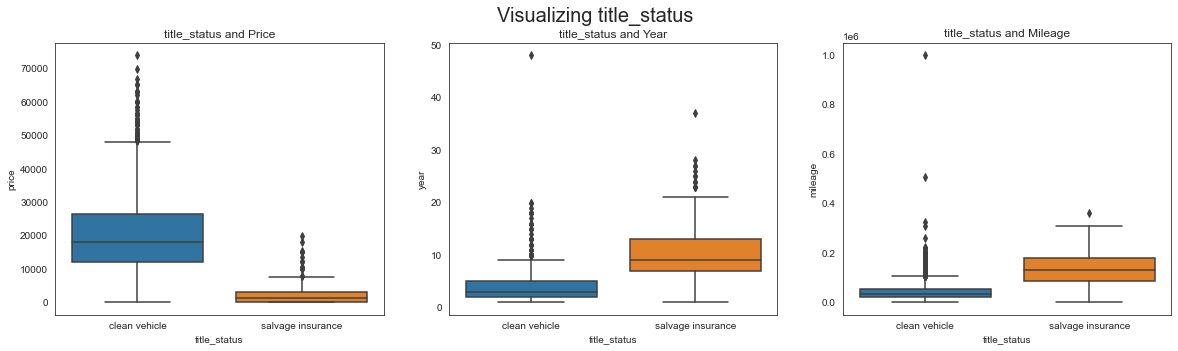

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Visualizing title_status', fontsize=20)

#Title Status and Price
sns.boxplot(ax=axes[0], x="title_status", y="price", data=df1)
axes[0].set_title("title_status and Price")

#Title Status and Year
sns.boxplot(ax=axes[1], x="title_status", y="year", data=df1)
axes[1].set_title("title_status and Year")

#Title Status and Mileage
sns.boxplot(ax=axes[2], x="title_status", y="mileage", data=df1)
axes[2].set_title("title_status and Mileage")

##### Model

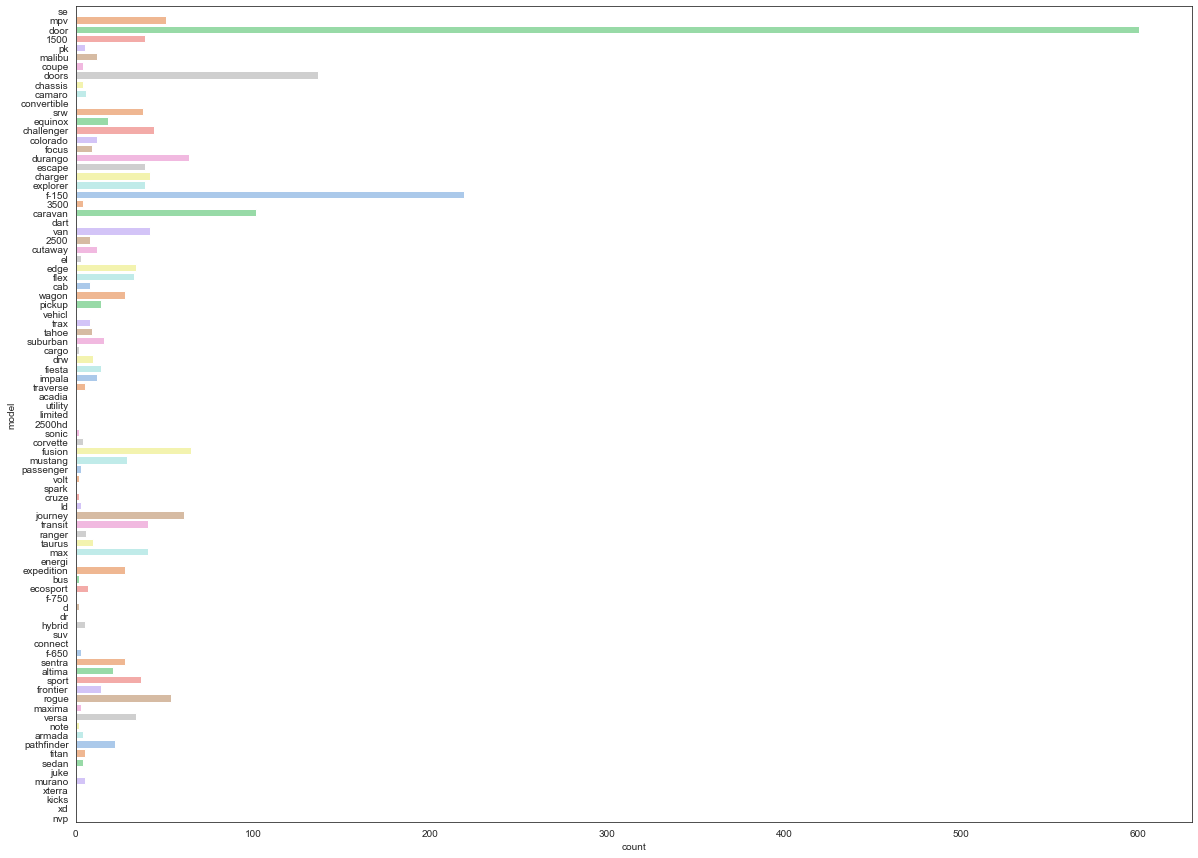

In [29]:
f, ax = plt.subplots(figsize=(20, 15))
sns.countplot(y="model", data=df1, palette="pastel")

##### Color

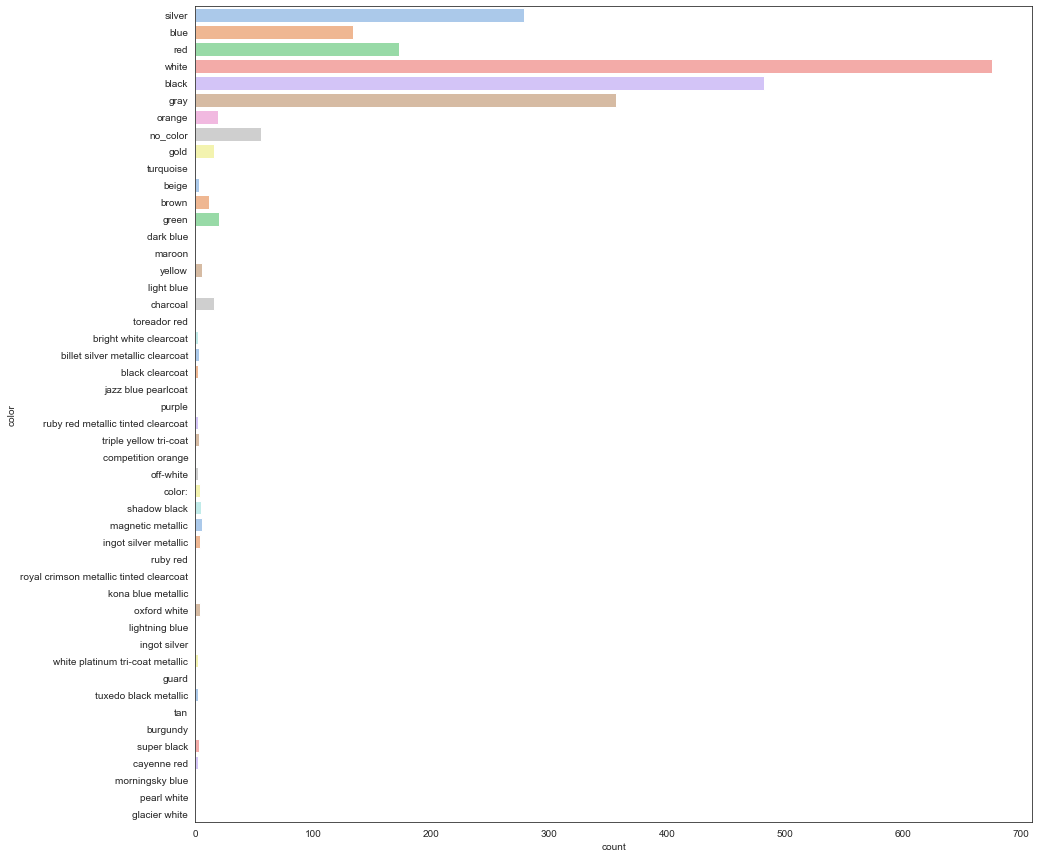

In [30]:
f, ax = plt.subplots(figsize=(15, 15))
sns.countplot(y="color", data=df1, palette="pastel")

##### State

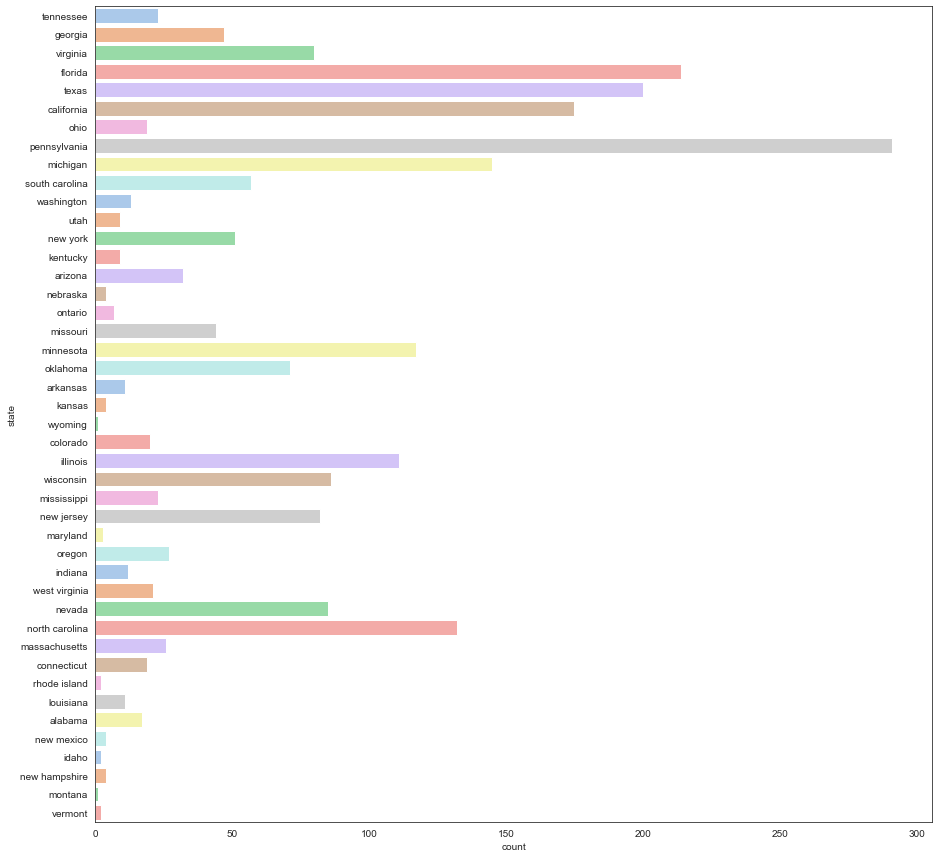

In [31]:
f, ax = plt.subplots(figsize=(15, 15))
sns.countplot(y="state", data=df1, palette="pastel")

### Data Preparation

#### Separate the Categorical and Numeric Variables

In [32]:
df1_categorical = df1[['brand','title_status','model','color','state']]
df1_categorical

,brand,title_status,model,color,state
0,ford,clean vehicle,se,silver,tennessee
1,dodge,clean vehicle,mpv,silver,georgia
2,ford,clean vehicle,door,blue,virginia
3,chevrolet,clean vehicle,1500,red,florida
4,dodge,clean vehicle,mpv,white,texas
...,...,...,...,...,...
2309,nissan,clean vehicle,versa,red,california
2310,nissan,clean vehicle,versa,silver,florida
2311,nissan,clean vehicle,versa,silver,florida
2312,nissan,clean vehicle,versa,black,florida


In [33]:
df1_numerical = df1[['price','year','mileage']]
df1_numerical

,price,year,mileage
0,2899,10,190552.0
1,5350,3,39590.0
2,25000,7,64146.0
3,27700,3,6654.0
4,5700,3,45561.0
...,...,...,...
2309,7800,2,23609.0
2310,9200,3,34553.0
2311,9200,3,31594.0
2312,9200,3,32557.0


#### OneHot Encode the Categorical Variables

By default, the encoder derives the categories based on the unique values in each feature.<br>
The method below one_hot encodes the categorical features to keep the prefixes for each feature when creating binary variables for categorical predictor levels.

In [34]:
def onehot_encode(df, columns_with_prefixes):
    df = df.copy()
    for column, prefix in columns_with_prefixes:
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1) 
    return df

In [35]:
df1_categorical = onehot_encode(
    df1_categorical,
    columns_with_prefixes=[
        ('brand', 'br'),
        ('model', 'md'),
        ('color', 'cl'),
        ('state', 'st'),
        ('title_status', 'ts')
     ]
 )

In [36]:
df1_categorical.describe(include='all')

,br_chevrolet,br_dodge,br_ford,br_gmc,br_nissan,md_1500,md_2500,md_2500hd,md_3500,md_acadia,...,st_texas,st_utah,st_vermont,st_virginia,st_washington,st_west virginia,st_wisconsin,st_wyoming,ts_clean vehicle,ts_salvage insurance
count,2314.000,2314.000,2314.000,2314.000,2314.000,2314.000,2314.000,2.314e+03,2314.000,2.314e+03,...,2314.000,2314.000,2.314e+03,2314.000,2314.000,2314.000,2314.000,2.314e+03,2314.000,2314.000
mean,0.127,0.187,0.534,0.018,0.135,0.017,0.003,4.322e-04,0.002,4.322e-04,...,0.086,0.004,8.643e-04,0.035,0.006,0.009,0.037,4.322e-04,0.939,0.061
std,0.333,0.390,0.499,0.134,0.342,0.129,0.059,2.079e-02,0.042,2.079e-02,...,0.281,0.062,2.939e-02,0.183,0.075,0.095,0.189,2.079e-02,0.238,0.238
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000e+00,...,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000e+00,...,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000e+00,1.000,0.000
50%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000e+00,...,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000e+00,1.000,0.000
75%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000e+00,...,0.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000e+00,1.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000e+00,1.000,1.000e+00,...,1.000,1.000,1.000e+00,1.000,1.000,1.000,1.000,1.000e+00,1.000,1.000


In [37]:
df1_categorical

,br_chevrolet,br_dodge,br_ford,br_gmc,br_nissan,md_1500,md_2500,md_2500hd,md_3500,md_acadia,...,st_texas,st_utah,st_vermont,st_virginia,st_washington,st_west virginia,st_wisconsin,st_wyoming,ts_clean vehicle,ts_salvage insurance
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2310,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2311,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2312,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Concatenate the numerical and categorical dataframe

In [38]:
df_2 = pd.concat([df1_numerical, df1_categorical], axis=1)
df_2

,price,year,mileage,br_chevrolet,br_dodge,br_ford,br_gmc,br_nissan,md_1500,md_2500,...,st_texas,st_utah,st_vermont,st_virginia,st_washington,st_west virginia,st_wisconsin,st_wyoming,ts_clean vehicle,ts_salvage insurance
0,2899,10,190552.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5350,3,39590.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,25000,7,64146.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,27700,3,6654.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5700,3,45561.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,7800,2,23609.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2310,9200,3,34553.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2311,9200,3,31594.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2312,9200,3,32557.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Scaling the input

Standardize features by removing the mean and scaling to unit variance

In [39]:
scaler = StandardScaler()
df_2 = pd.DataFrame(scaler.fit_transform(df_2.drop(['price'],axis=1)), columns=df_2.drop(['price'],axis=1).columns)
df_2

,year,mileage,br_chevrolet,br_dodge,br_ford,br_gmc,br_nissan,md_1500,md_2500,md_2500hd,...,st_texas,st_utah,st_vermont,st_virginia,st_washington,st_west virginia,st_wisconsin,st_wyoming,ts_clean vehicle,ts_salvage insurance
0,1.746,2.769,-0.381,-0.479,0.935,-0.136,-0.395,-0.131,-0.059,-0.021,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
1,-0.360,-0.225,-0.381,2.087,-1.070,-0.136,-0.395,-0.131,-0.059,-0.021,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
2,0.844,0.262,-0.381,-0.479,0.935,-0.136,-0.395,-0.131,-0.059,-0.021,...,-0.308,-0.062,-0.029,5.284,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
3,-0.360,-0.878,2.626,-0.479,-1.070,-0.136,-0.395,7.638,-0.059,-0.021,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
4,-0.360,-0.107,-0.381,2.087,-1.070,-0.136,-0.395,-0.131,-0.059,-0.021,...,3.251,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,-0.661,-0.542,-0.381,-0.479,-1.070,-0.136,2.533,-0.131,-0.059,-0.021,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
2310,-0.360,-0.325,-0.381,-0.479,-1.070,-0.136,2.533,-0.131,-0.059,-0.021,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
2311,-0.360,-0.384,-0.381,-0.479,-1.070,-0.136,2.533,-0.131,-0.059,-0.021,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
2312,-0.360,-0.365,-0.381,-0.479,-1.070,-0.136,2.533,-0.131,-0.059,-0.021,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254


In [40]:
df_2 = pd.concat([df1_numerical['price'],df_2], axis = 1)
df_2

,price,year,mileage,br_chevrolet,br_dodge,br_ford,br_gmc,br_nissan,md_1500,md_2500,...,st_texas,st_utah,st_vermont,st_virginia,st_washington,st_west virginia,st_wisconsin,st_wyoming,ts_clean vehicle,ts_salvage insurance
0,2899,1.746,2.769,-0.381,-0.479,0.935,-0.136,-0.395,-0.131,-0.059,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
1,5350,-0.360,-0.225,-0.381,2.087,-1.070,-0.136,-0.395,-0.131,-0.059,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
2,25000,0.844,0.262,-0.381,-0.479,0.935,-0.136,-0.395,-0.131,-0.059,...,-0.308,-0.062,-0.029,5.284,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
3,27700,-0.360,-0.878,2.626,-0.479,-1.070,-0.136,-0.395,7.638,-0.059,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
4,5700,-0.360,-0.107,-0.381,2.087,-1.070,-0.136,-0.395,-0.131,-0.059,...,3.251,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,7800,-0.661,-0.542,-0.381,-0.479,-1.070,-0.136,2.533,-0.131,-0.059,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
2310,9200,-0.360,-0.325,-0.381,-0.479,-1.070,-0.136,2.533,-0.131,-0.059,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
2311,9200,-0.360,-0.384,-0.381,-0.479,-1.070,-0.136,2.533,-0.131,-0.059,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254
2312,9200,-0.360,-0.365,-0.381,-0.479,-1.070,-0.136,2.533,-0.131,-0.059,...,-0.308,-0.062,-0.029,-0.189,-0.075,-0.096,-0.196,-0.021,0.254,-0.254


In [41]:
df_2.describe()

,price,year,mileage,br_chevrolet,br_dodge,br_ford,br_gmc,br_nissan,md_1500,md_2500,...,st_texas,st_utah,st_vermont,st_virginia,st_washington,st_west virginia,st_wisconsin,st_wyoming,ts_clean vehicle,ts_salvage insurance
count,2314.000,2.314e+03,2.314e+03,2.314e+03,2.314e+03,2.314e+03,2.314e+03,2.314e+03,2.314e+03,2.314e+03,...,2.314e+03,2.314e+03,2.314e+03,2.314e+03,2.314e+03,2.314e+03,2.314e+03,2.314e+03,2.314e+03,2.314e+03
mean,19088.407,6.939e-16,2.963e-17,1.916e-15,-9.175e-15,4.535e-16,-2.942e-15,3.702e-15,-2.668e-15,-8.020e-16,...,-1.547e-15,-4.126e-16,-1.102e-15,4.504e-16,-1.700e-15,8.896e-17,-1.276e-15,8.684e-17,-1.339e-15,1.320e-15
std,11944.640,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,...,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00
min,0.000,-9.617e-01,-1.010e+00,-3.808e-01,-4.791e-01,-1.070e+00,-1.360e-01,-3.948e-01,-1.309e-01,-5.890e-02,...,-3.076e-01,-6.249e-02,-2.941e-02,-1.892e-01,-7.516e-02,-9.570e-02,-1.965e-01,-2.079e-02,-3.941e+00,-2.538e-01
25%,10607.500,-6.608e-01,-5.859e-01,-3.808e-01,-4.791e-01,-1.070e+00,-1.360e-01,-3.948e-01,-1.309e-01,-5.890e-02,...,-3.076e-01,-6.249e-02,-2.941e-02,-1.892e-01,-7.516e-02,-9.570e-02,-1.965e-01,-2.079e-02,2.538e-01,-2.538e-01
50%,17175.000,-3.599e-01,-3.089e-01,-3.808e-01,-4.791e-01,9.347e-01,-1.360e-01,-3.948e-01,-1.309e-01,-5.890e-02,...,-3.076e-01,-6.249e-02,-2.941e-02,-1.892e-01,-7.516e-02,-9.570e-02,-1.965e-01,-2.079e-02,2.538e-01,-2.538e-01
75%,25900.000,2.419e-01,2.344e-01,-3.808e-01,-4.791e-01,9.347e-01,-1.360e-01,-3.948e-01,-1.309e-01,-5.890e-02,...,-3.076e-01,-6.249e-02,-2.941e-02,-1.892e-01,-7.516e-02,-9.570e-02,-1.965e-01,-2.079e-02,2.538e-01,-2.538e-01
max,74000.000,1.318e+01,1.882e+01,2.626e+00,2.087e+00,9.347e-01,7.355e+00,2.533e+00,7.638e+00,1.698e+01,...,3.251e+00,1.600e+01,3.400e+01,5.284e+00,1.330e+01,1.045e+01,5.090e+00,4.809e+01,2.538e-01,3.941e+00


---

### Predictive Modeling

At this point the data looks good to start the process towards modeling. However, there a lot of feature columns in the dataset, which point in the direction of dimensioality reduction for efficient model performance.

#### Split the dataframe produced into input and output variables

In [42]:
X = df_2.drop('price', axis = 1).values
y = df_2['price'].values

#### Split the data in to train and test set

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [44]:
np.shape(X_train)

(1619, 190)

In [45]:
np.shape(y_train)

(1619,)

In [46]:
X_train

array([[ 3.85271023,  2.30189026, -0.38075942, ..., -0.02079276,
        -3.94063084,  3.94063084],
       [-0.66084357, -0.57925755, -0.38075942, ..., -0.02079276,
         0.25376648, -0.25376648],
       [ 0.24186719,  0.42246347, -0.38075942, ..., -0.02079276,
         0.25376648, -0.25376648],
       ...,
       [-0.35993999, -0.16812116, -0.38075942, ..., -0.02079276,
         0.25376648, -0.25376648],
       [ 0.24186719,  0.13861475, -0.38075942, ..., -0.02079276,
         0.25376648, -0.25376648],
       [-0.66084357, -0.75878512, -0.38075942, ..., -0.02079276,
         0.25376648, -0.25376648]])

#### Spot Checking a few Regression models with cross validation on the Training dataset

In [47]:
from sklearn import model_selection

#Preparing models
models = []
models.append(('Random Forest', RandomForestRegressor()))
models.append(('XG Boosting', XGBRegressor()))
models.append(('K-Nearest Neighbors', KNeighborsRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))

#Evaluating each model in turn
results = []
names = []
scoring = 'r2'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    spotcheck_output = "%s: %.3f" % (name, cv_results.mean())
    print(spotcheck_output)

Random Forest: 0.660
XG Boosting: 0.680
K-Nearest Neighbors: 0.543
Decision Tree: 0.408
Gradient Boosting: 0.642


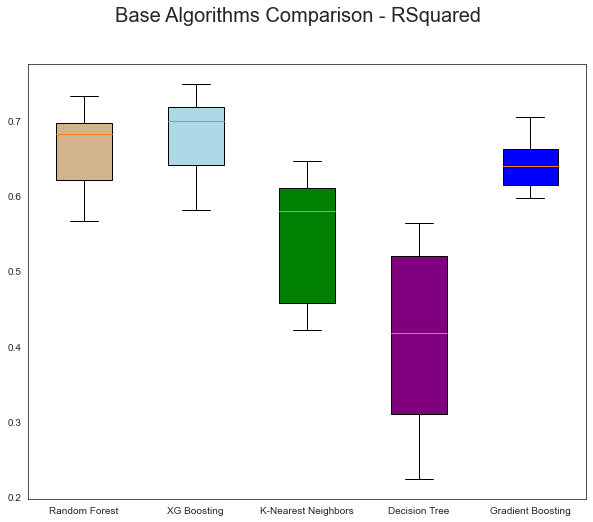

In [48]:
#compare algorithms
fig=plt.figure(figsize=(10,8))
fig.suptitle('Base Algorithms Comparison - RSquared', fontsize=20)
ax=fig.add_subplot(111)
bplot1=plt.boxplot(results, patch_artist=True)
ax.set_xticklabels(names)

colors = ['tan', 'lightblue', 'green', 'purple', 'blue']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

#### Lets evaluate the models on making predictions

##### RandomForestRegressor()

In [49]:
random_forest = RandomForestRegressor()
base_rf_predict_model = random_forest.fit(X_train, y_train)
y_pred = base_rf_predict_model.predict((X_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R_2 = {:.2f} %".format((r2_score(y_test, y_pred)*100)))
print("Variance score = {:.2f} %".format((base_rf_predict_model.score(X_test, y_test)*100)))

Mean Absolute Error: 3957.5076115107913
Mean Squared Error: 36840561.981187195
Root Mean Squared Error: 6069.642656795142
R_2 = 72.93 %
Variance score = 72.93 %


##### XGBRegressor()

In [50]:
xgb_model = XGBRegressor()
base_xgb_predict_model = xgb_model.fit(X_train, y_train)
y_pred = base_xgb_predict_model.predict((X_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R_2 = {:.2f} %".format((r2_score(y_test, y_pred)*100)))
print("Variance score = {:.2f} %".format((base_xgb_predict_model.score(X_test, y_test)*100)))

Mean Absolute Error: 4016.4639647422077
Mean Squared Error: 35517633.58071563
Root Mean Squared Error: 5959.667237414823
R_2 = 73.90 %
Variance score = 73.90 %


##### Hyperparameter Tuning for XGBRegressor() to see if we acheive better results

In [89]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7, 0.8, 0.95],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [90]:
#Fit the tuned model on the training dataset
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 16.3min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.95}

In [85]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.1,
        max_depth = 5,
        min_child_weight = 1,
        n_estimators = 500,
        subsample = 0.95)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print('MSE: ',mean_squared_error(y_test,y_pred_xgb))
print('R2: ',r2_score(y_test,y_pred_xgb)*100, '%')
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred_xgb))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

MSE:  33511036.622043252
R2:  75.37912108608108 %
MAE:  3874.3044465428634
RMSE:  5788.871791812568


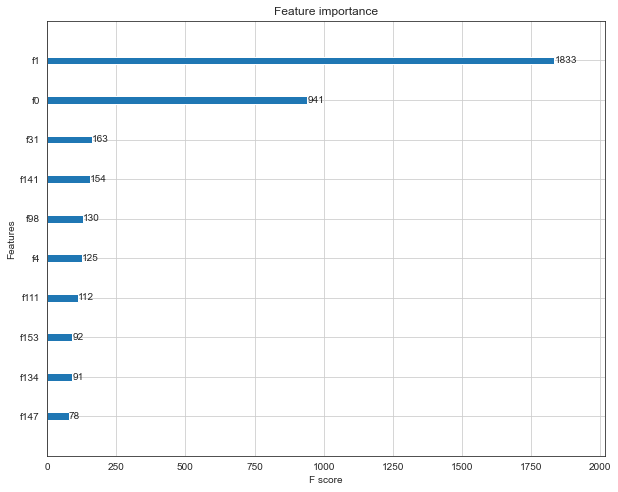

In [86]:
xgb.plot_importance(xgb_model, max_num_features=10)
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

f1 is mileage, which seems to be the most important feature <br>
f0 is the year, which also is a very important feature

#### Plotting to see how closely does the model predict the values

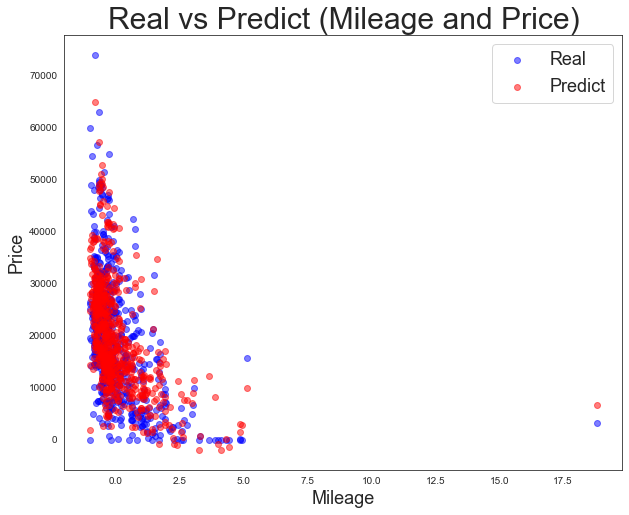

In [87]:
#Plot Real vs Predict - Mileage and Price
plt.scatter(X_test[:,1] , y_test,          color='blue', label='Real',    alpha=0.5)
plt.scatter(X_test[:,1] , y_pred_xgb,  color='red' , label='Predict', alpha=0.5)
plt.title("Real vs Predict (Mileage and Price)", fontsize = 30)
plt.legend(loc='best', fontsize=18)
plt.xlabel("Mileage", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.show()

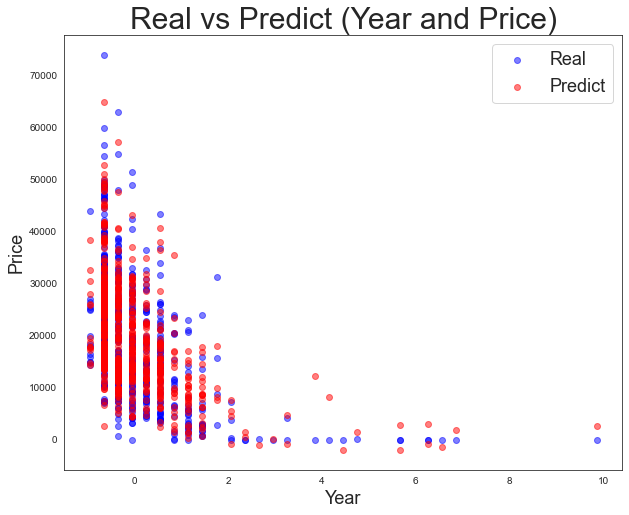

In [145]:
#Plot Real vs Predict - Year and Price
plt.scatter(X_test[:,0] , y_test,          color='blue', label='Real',    alpha=0.5)
plt.scatter(X_test[:,0] , y_pred_xgb,  color='red' , label='Predict', alpha=0.5)
plt.title("Real vs Predict (Year and Price)", fontsize = 30)
plt.legend(loc='best', fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.show()

The model seems to be predicting price, closely to the price. The visualizations above show how imperative the year and mileage columns are in predicting price, even after removing other brands of cars.